### Environment B
- Constructing the 2D-Grid of 30x30.
- Adding random blocks, once initialized, stays the same.

In [1]:
%matplotlib notebook

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation

In [2]:
# Constants
GRID_SIZE = 30
NUM_BLOCKS = 15
NUM_MOVING_BLOCKS = 5

In [3]:
#Making the 2D-Grid
grid_size = GRID_SIZE
grid = np.zeros((grid_size, grid_size))

#Generate Fixed Obstacles
def generate_fixed_obstacles(grid_size, num_blocks, current_grid):
    """Generates fixed obstacles on the grid."""
    blocks = set()
    while len(blocks) < num_blocks:
        x, y = random.randint(0, grid_size - 1), random.randint(0, grid_size - 1)
        if current_grid[x][y] == 0: # Ensure no overlap with existing blocks
            blocks.add((x, y))
            current_grid[x][y] = -1 # Mark as fixed obstacle
    return blocks

In [4]:
#Initialize moving blocks
def initialize_moving_blocks(grid_size, num_moving_blocks, fixed_blocks):
    """Initializes moving blocks, ensuring no overlap with fixed blocks."""
    moving_blocks_positions = []
    # Using a set for efficient checking of occupied cells
    occupied_cells = set(fixed_blocks) 

    while len(moving_blocks_positions) < num_moving_blocks:
        x, y = random.randint(0, grid_size - 1), random.randint(0, grid_size - 1)
        if (x, y) not in occupied_cells:
            moving_blocks_positions.append({'pos': (x, y), 'patch': None}) # Store position and placeholder for patch
            occupied_cells.add((x, y)) # Mark as occupied
    return moving_blocks_positions

In [5]:
# Moving blocks on the grid
def move_block(block_info, grid_size, fixed_blocks, moving_blocks_positions):
    """
    Calculates the next valid position for a single moving block.
    Avoids collision with fixed blocks and other moving blocks.
    """
    current_x, current_y = block_info['pos']
    possible_moves = [(0, 1), (0, -1), (1, 0), (-1, 0)] # N, S, E, W
    random.shuffle(possible_moves) # Randomize direction preference

    for dx, dy in possible_moves:
        new_x, new_y = current_x + dx, current_y + dy

        # Check grid boundaries
        if not (0 <= new_x < grid_size and 0 <= new_y < grid_size):
            continue

        # Check collision with fixed blocks
        if (new_x, new_y) in fixed_blocks:
            continue

        # Check collision with other moving blocks in their *current* positions
        # This is a simplification; for more robust collision, you'd need to
        # consider future positions or use a turn-based system.
        is_colliding_with_other_moving = False
        for other_block_info in moving_blocks_positions:
            if other_block_info['pos'] == (new_x, new_y) and other_block_info is not block_info:
                is_colliding_with_other_moving = True
                break
        
        if is_colliding_with_other_moving:
            continue

        # If a valid move is found, update the block's position
        block_info['pos'] = (new_x, new_y)
        return True # Successfully moved

    return False # No valid move found for this step (block stays in place)

# --- Setup the Grid and Blocks ---
fixed_blocks_coords = generate_fixed_obstacles(GRID_SIZE, NUM_BLOCKS, grid)
moving_blocks = initialize_moving_blocks(GRID_SIZE, NUM_MOVING_BLOCKS, fixed_blocks_coords)

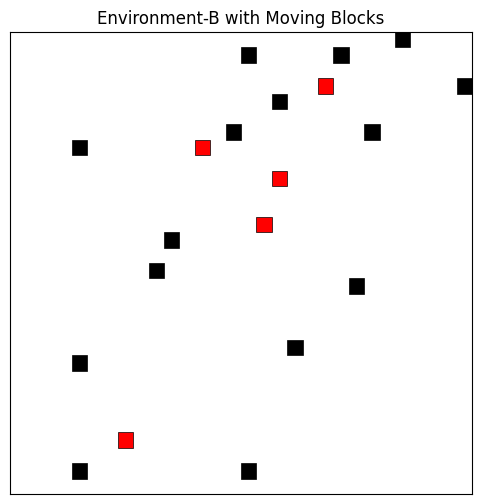

In [6]:
# --- Matplotlib Setup ---
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, GRID_SIZE)
ax.set_ylim(0, GRID_SIZE)
ax.set_title("Environment-B with Moving Blocks")
ax.set_xticks([])
ax.set_yticks([])

# Draw fixed obstacles
fixed_patches = []
for (x, y) in fixed_blocks_coords:
    square = patches.Rectangle((x, y), 1, 1, linewidth=0.5, edgecolor='black', facecolor='black')
    ax.add_patch(square)
    fixed_patches.append(square)

# Initialize moving block patches
moving_patches = []
for block_info in moving_blocks:
    x, y = block_info['pos']
    square = patches.Rectangle((x, y), 1, 1, linewidth=0.5, edgecolor='black', facecolor='red') # Blue for moving
    ax.add_patch(square)
    block_info['patch'] = square # Store the patch reference in the block_info dictionary
    moving_patches.append(square)

plt.gca().set_aspect('equal', adjustable='box')

In [7]:
# --- Animation Function ---
def animate(frame):
    """
    This function is called repeatedly by the animation.
    It updates the positions of the moving blocks.
    """
    for block_info in moving_blocks:
        move_block(block_info, GRID_SIZE, fixed_blocks_coords, moving_blocks)
        x, y = block_info['pos']
        block_info['patch'].set_xy((x, y)) # Update the patch's position

    return moving_patches # Return the list of patches that were modified

# Create the animation
# frames: number of frames (e.g., 200 steps)
# interval: delay between frames in milliseconds (e.g., 200ms)
ani = animation.FuncAnimation(fig, animate, frames=200, interval=200, blit=False, repeat=True)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>